In [1]:
import torch
import torchvision
import os,  sys
import numpy as np
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [2]:
# steps required: compute gfb outputs for all images, at once.
# compute covariance matrix from the gfb outputs.

In [3]:
(128 * 32 * 32)**2 * 4 / 2**30

64.0

In [4]:
1099511627776/ 2**30

1024.0

In [5]:
# compute gfb outputs for all images, in succession.
# this cannot be done all at once:
fz = 246 # in mb
channels = 512
fz * channels / 1024 # memory in gb.
# so we compute in batches, and approximate from these batches

123.0

In [6]:
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F

In [7]:
from vonenet.modules import GFB

/Users/metehergul/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [8]:
batch = 128
colour = 3
dim = 64

x = torch.rand(batch, colour, dim, dim)

In [9]:
in_channels = colour
cc = 8
out_channels = 2 * cc
kernel_size = 7
padding = kernel_size // 2
stride = 2

# weight = torch.rand((out_channels, in_channels, kernel_size, kernel_size))
# res = F.conv2d(x, weight, None, stride, padding)

In [10]:
from vonenet.vonenet import VOneNet

In [11]:
visual_degrees = 2
k_exc = 7
# stride = 4
image_size=64

von = VOneNet(simple_channels=cc, model_arch="resnet18", complex_channels=cc, k_exc=k_exc, ksize=kernel_size, stride = stride, image_size=image_size, visual_degrees=visual_degrees)

Neuronal distributions gabor parameters
Model:  VOneResNet18


/Users/metehergul/vonenet-mete/vonenet/params.py:59: RuntimeWarning: invalid value encountered in divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)
/Users/metehergul/Library/Python/3.9/lib/python/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [12]:
voneblock = von[0]

In [13]:
sfs = von[0].sf
sigxs = von[0].sigx
sigys = von[0].sigy
thetas = von[0].theta
offsets = von[0].phase

In [14]:
from vonenet.utils import gabor_kernel

In [15]:
filters_r = voneblock.simple_conv_q0.weight[:,0,:,:]
filters_r.shape

torch.Size([16, 7, 7])

In [16]:
try:
    os.mkdir("runlog")
except:
    print("Directory already exists.")
    pass

Directory already exists.


In [23]:
import os, argparse, time, subprocess, io, shlex, pickle, pprint
import pandas as pd
import numpy as np
import tqdm
import fire

In [76]:
batch_size = 128
model_arch = "resnet18"
normalization = "vonenet"
visual_degrees = 2
stride = 2
ksize = 25
k_exc = 25
simple_channels = 8
complex_channels = simple_channels
image_size = 64

von = VOneNet(simple_channels=simple_channels, complex_channels=complex_channels, model_arch="resnet18", noise_mode="None", k_exc=k_exc, ksize=ksize, stride = stride, image_size=image_size, visual_degrees=visual_degrees)


Neuronal distributions gabor parameters
Model:  VOneResNet18


/Users/metehergul/vonenet-mete/vonenet/params.py:59: RuntimeWarning: invalid value encountered in divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)


In [77]:
von = VOneNet(gabor_seed=0, simple_channels=simple_channels, complex_channels=complex_channels, model_arch="resnet18", noise_mode="None", k_exc=k_exc, ksize=ksize, stride = stride, image_size=image_size, visual_degrees=visual_degrees)
voneblock = von[0]
voneblock

Neuronal distributions gabor parameters
Model:  VOneResNet18


VOneBlock(
  (simple_conv_q0): GFB()
  (simple_conv_q1): GFB()
  (simple): ReLU(inplace=True)
  (complex): Identity()
  (gabors): Identity()
  (noise): ReLU(inplace=True)
  (output): Identity()
)

In [78]:
voneblock.simple_conv_q0.weight = nn.Parameter(F.interpolate(voneblock.simple_conv_q0.weight, size = (9,9)), requires_grad = False)
voneblock.simple_conv_q1.weight = nn.Parameter(F.interpolate(voneblock.simple_conv_q1.weight, size = (9,9)), requires_grad = False)

voneblock.ksize = 9

voneblock.simple_conv_q0.padding = (voneblock.ksize//2, voneblock.ksize//2)
voneblock.simple_conv_q1.padding = (voneblock.ksize//2, voneblock.ksize//2)

filters_r = voneblock.simple_conv_q0.weight
random_channel = voneblock.simple_conv_q0.random_channel
filters_r.shape

torch.Size([16, 3, 9, 9])

In [79]:
chnls = ["r", "g", "b"]
cmaps = {"r": sns.light_palette("darkred", as_cmap=True),
         "g": sns.light_palette("seagreen", as_cmap=True),
         "b": sns.dark_palette("#69d", reverse=True, as_cmap=True)}

In [80]:
random_channel

tensor([0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1])

In [81]:
torch.manual_seed(23)
random_channel = torch.randint(0, 3, (64,))
random_channel

tensor([0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0,
        1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1,
        2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1])

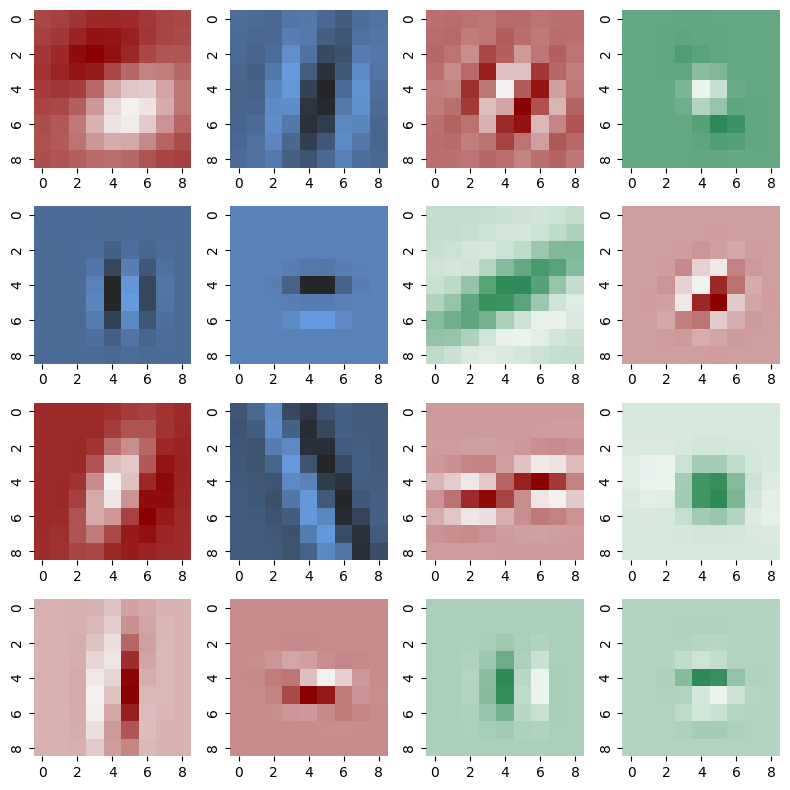

In [82]:
# Create a figure and axis object using Matplotlib
rows = int(np.sqrt(simple_channels+complex_channels))
fig, axes = plt.subplots(rows, rows, figsize = (8,8))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Loop through each subplot and plot the heatmap
for i, ax in enumerate(axes):
    if i < len(filters_r):
        cnl = random_channel[i]
        sns.heatmap(filters_r[i][cnl], ax=ax, cmap=cmaps[chnls[cnl]], cbar=False)
    else:
        ax.axis('off')  # Turn off axis for empty subplots

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [83]:
def data():
    dataset = torchvision.datasets.ImageFolder(
        os.path.join("tiny-imagenet-200", 'train'),
        torchvision.transforms.Compose([
            # torchvision.transforms.RandomResizedCrop(224),
            torchvision.transforms.RandomAffine(degrees=30, translate=(0.05, 0.05), scale=(1, 1.2)),
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.ToTensor(),
            # torchvision.transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
        ]))
    data_loader = torch.utils.data.DataLoader(dataset,
                                                batch_size=128,
                                                shuffle=True,
                                                num_workers=2,
                                                pin_memory=True)

    return data_loader

In [84]:
train_data = data()

In [85]:
for step, dt in enumerate(train_data):

    last_sample = dt
    
    if step == 0:
        break


In [86]:
last_sample[0][0]

tensor([[[0.8667, 0.8667, 0.7333,  ..., 0.0000, 0.0000, 0.0000],
         [0.8549, 0.8078, 0.6353,  ..., 0.0000, 0.0000, 0.0000],
         [0.8039, 0.7451, 0.5961,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.6235, 0.5804, 0.5294,  ..., 0.8745, 0.8196, 0.8235],
         [0.6235, 0.5843, 0.5137,  ..., 0.8392, 0.8471, 0.8471],
         [0.5804, 0.5765, 0.6039,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.4941, 0.5059, 0.4235,  ..., 0.0000, 0.0000, 0.0000],
         [0.5059, 0.4745, 0.3412,  ..., 0.0000, 0.0000, 0.0000],
         [0.4941, 0.4549, 0.3412,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0941, 0.0902, 0.0824,  ..., 0.5804, 0.5098, 0.4941],
         [0.0706, 0.0706, 0.0471,  ..., 0.5569, 0.5451, 0.5451],
         [0.0471, 0.0863, 0.1529,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0627, 0.0706, 0.0510,  ..., 0.0000, 0.0000, 0.0000],
         [0.0980, 0.0549, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.1294, 0.0745, 0.0118,  ..., 0.0000, 0.0000, 0.

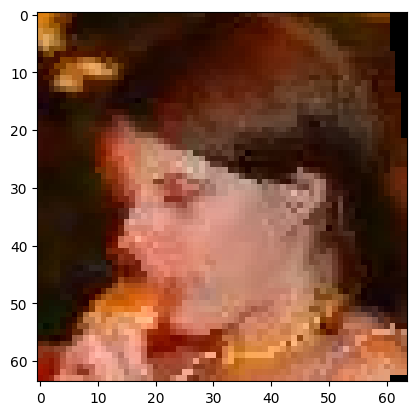

In [87]:
img = last_sample[0][0].permute(1,2,0)
plt.imshow(img)

In [88]:
out = voneblock.forward(last_sample[0])

VOneBlock output:  torch.Size([128, 16, 32, 32])


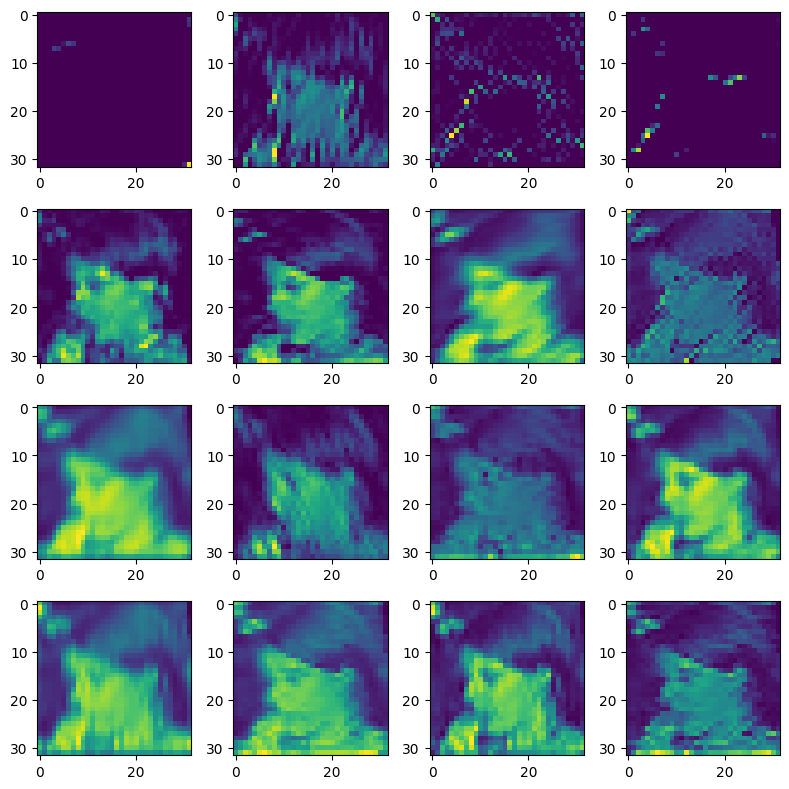

In [89]:
sz = out.shape[1]
btc = 0

rows = int(np.sqrt(sz))
fil = out[btc][:sz]
# Create a figure and axis object using Matplotlib
fig, axes = plt.subplots(rows, rows, figsize=(2*rows, 2*rows))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Loop through each subplot and plot the heatmap
for i, ax in enumerate(axes):
    if i < len(filters_r):
        ax.imshow(fil[i])
    else:
        ax.axis('off')  # Turn off axis for empty subplots

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [90]:
p1 = out.reshape(batch_size, -1)
p1.shape

torch.Size([128, 16384])

In [103]:
term1 = p1.T @ p1
term1.shape

torch.Size([16384, 16384])

In [104]:
term1.device

device(type='cpu')

In [105]:
m1 = torch.mean(p1, dim=0)
m1.shape
mn = torch.outer(m1, m1)

In [106]:
cov = term1 - mn
cov.shape

torch.Size([16384, 16384])

In [107]:
cov.shape

torch.Size([16384, 16384])

In [122]:
filters = cov[2].reshape(16, 32, 32)

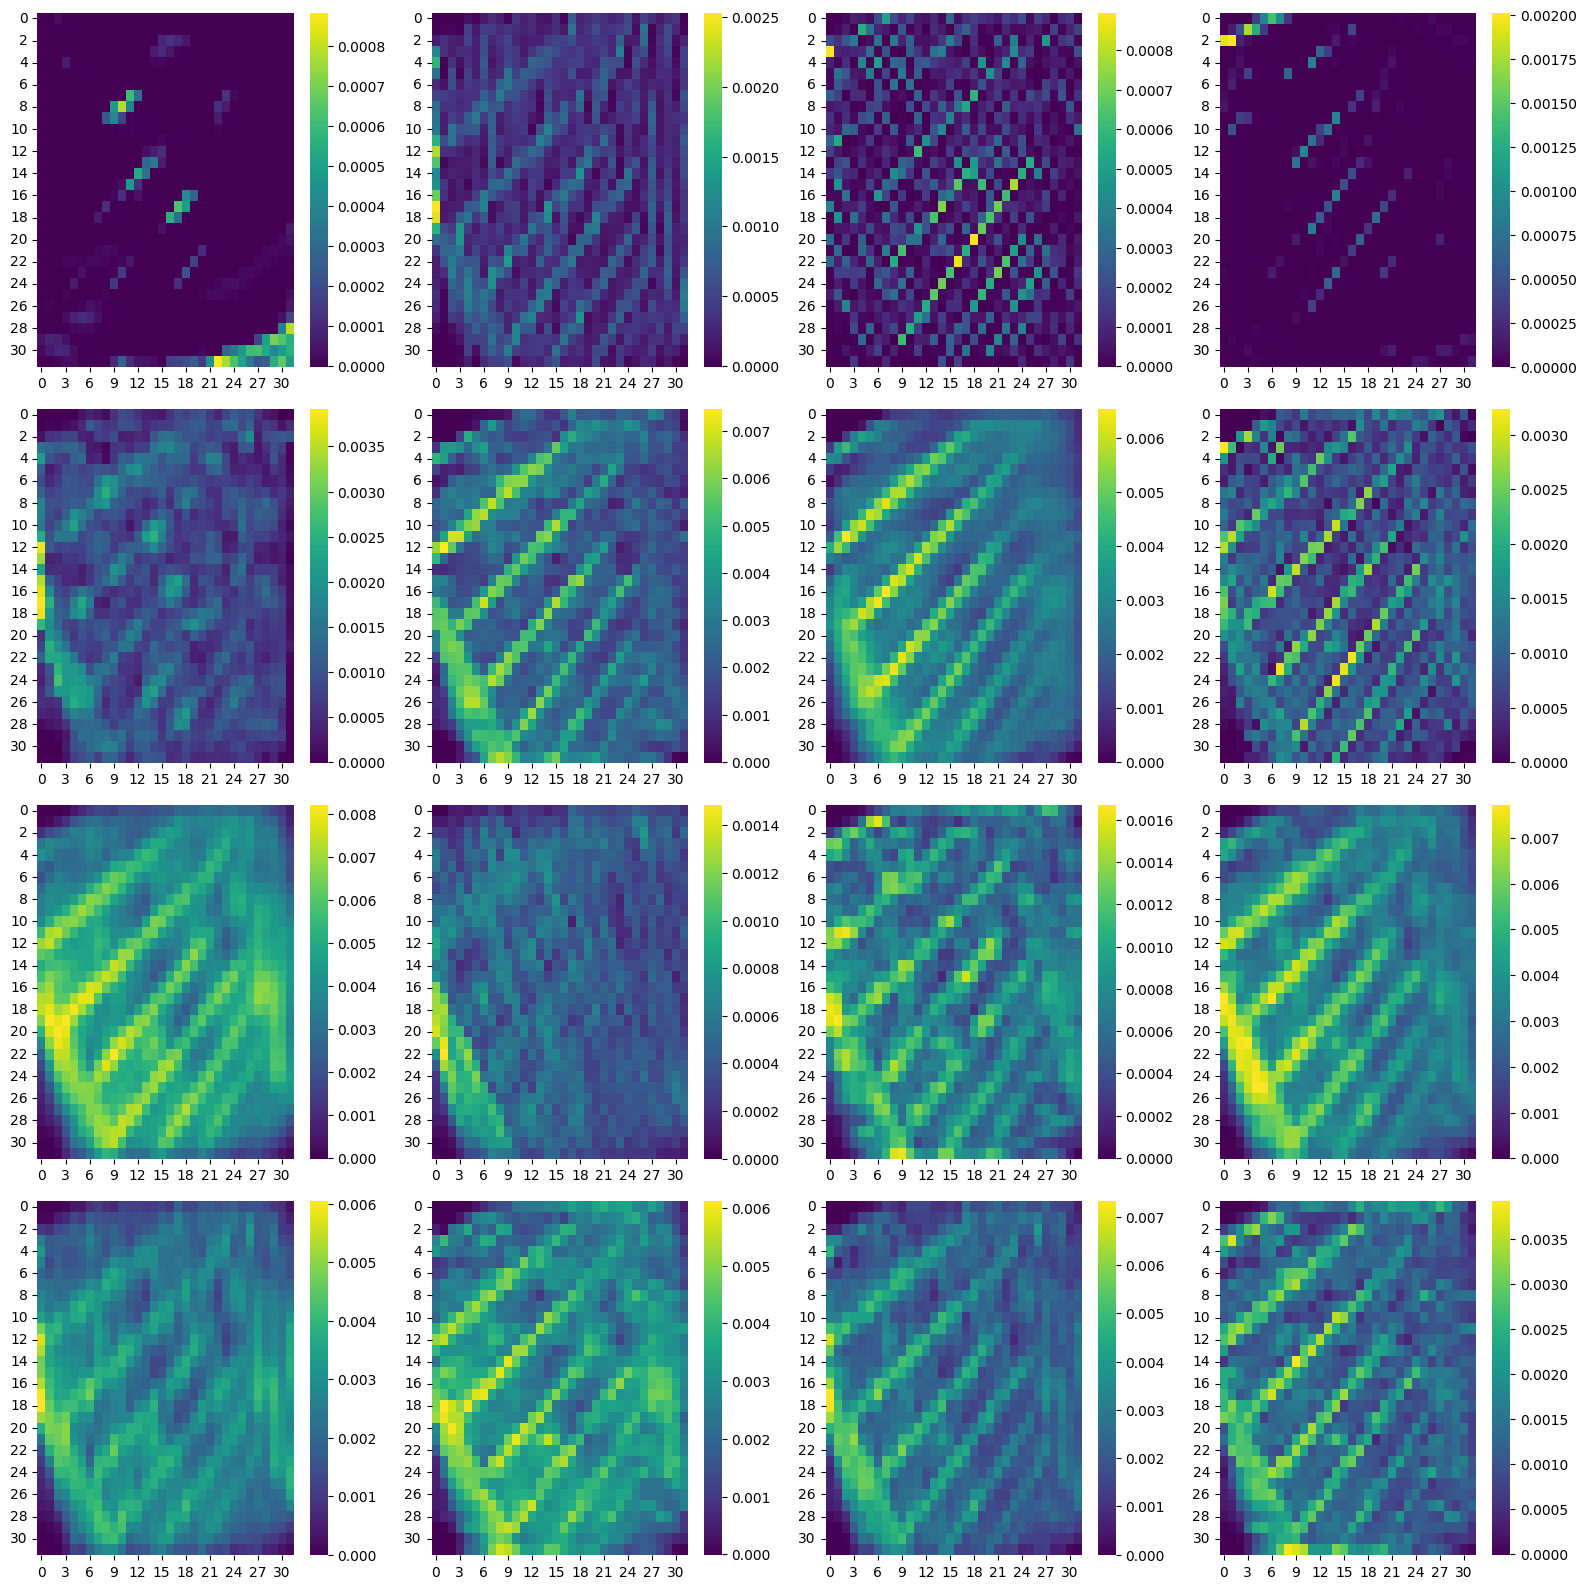

In [123]:
# Create a figure and axis object using Matplotlib
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Loop through each subplot and plot the heatmap
for i, ax in enumerate(axes):
    if i < len(filters):
        sns.heatmap(filters[i], ax=ax, cmap="viridis", cbar=True)
    else:
        ax.axis('off')  # Turn off axis for empty subplots

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [126]:
out.shape

torch.Size([128, 16, 32, 32])

In [131]:
trial = out[0].reshape(1,-1)
trial.shape

torch.Size([1, 16384])

In [132]:
cov.shape

torch.Size([16384, 16384])

In [155]:
div = cov @ trial.T

In [156]:
div.shape

torch.Size([16384, 1])

In [157]:
divvie = div.reshape(16, 32, 32)

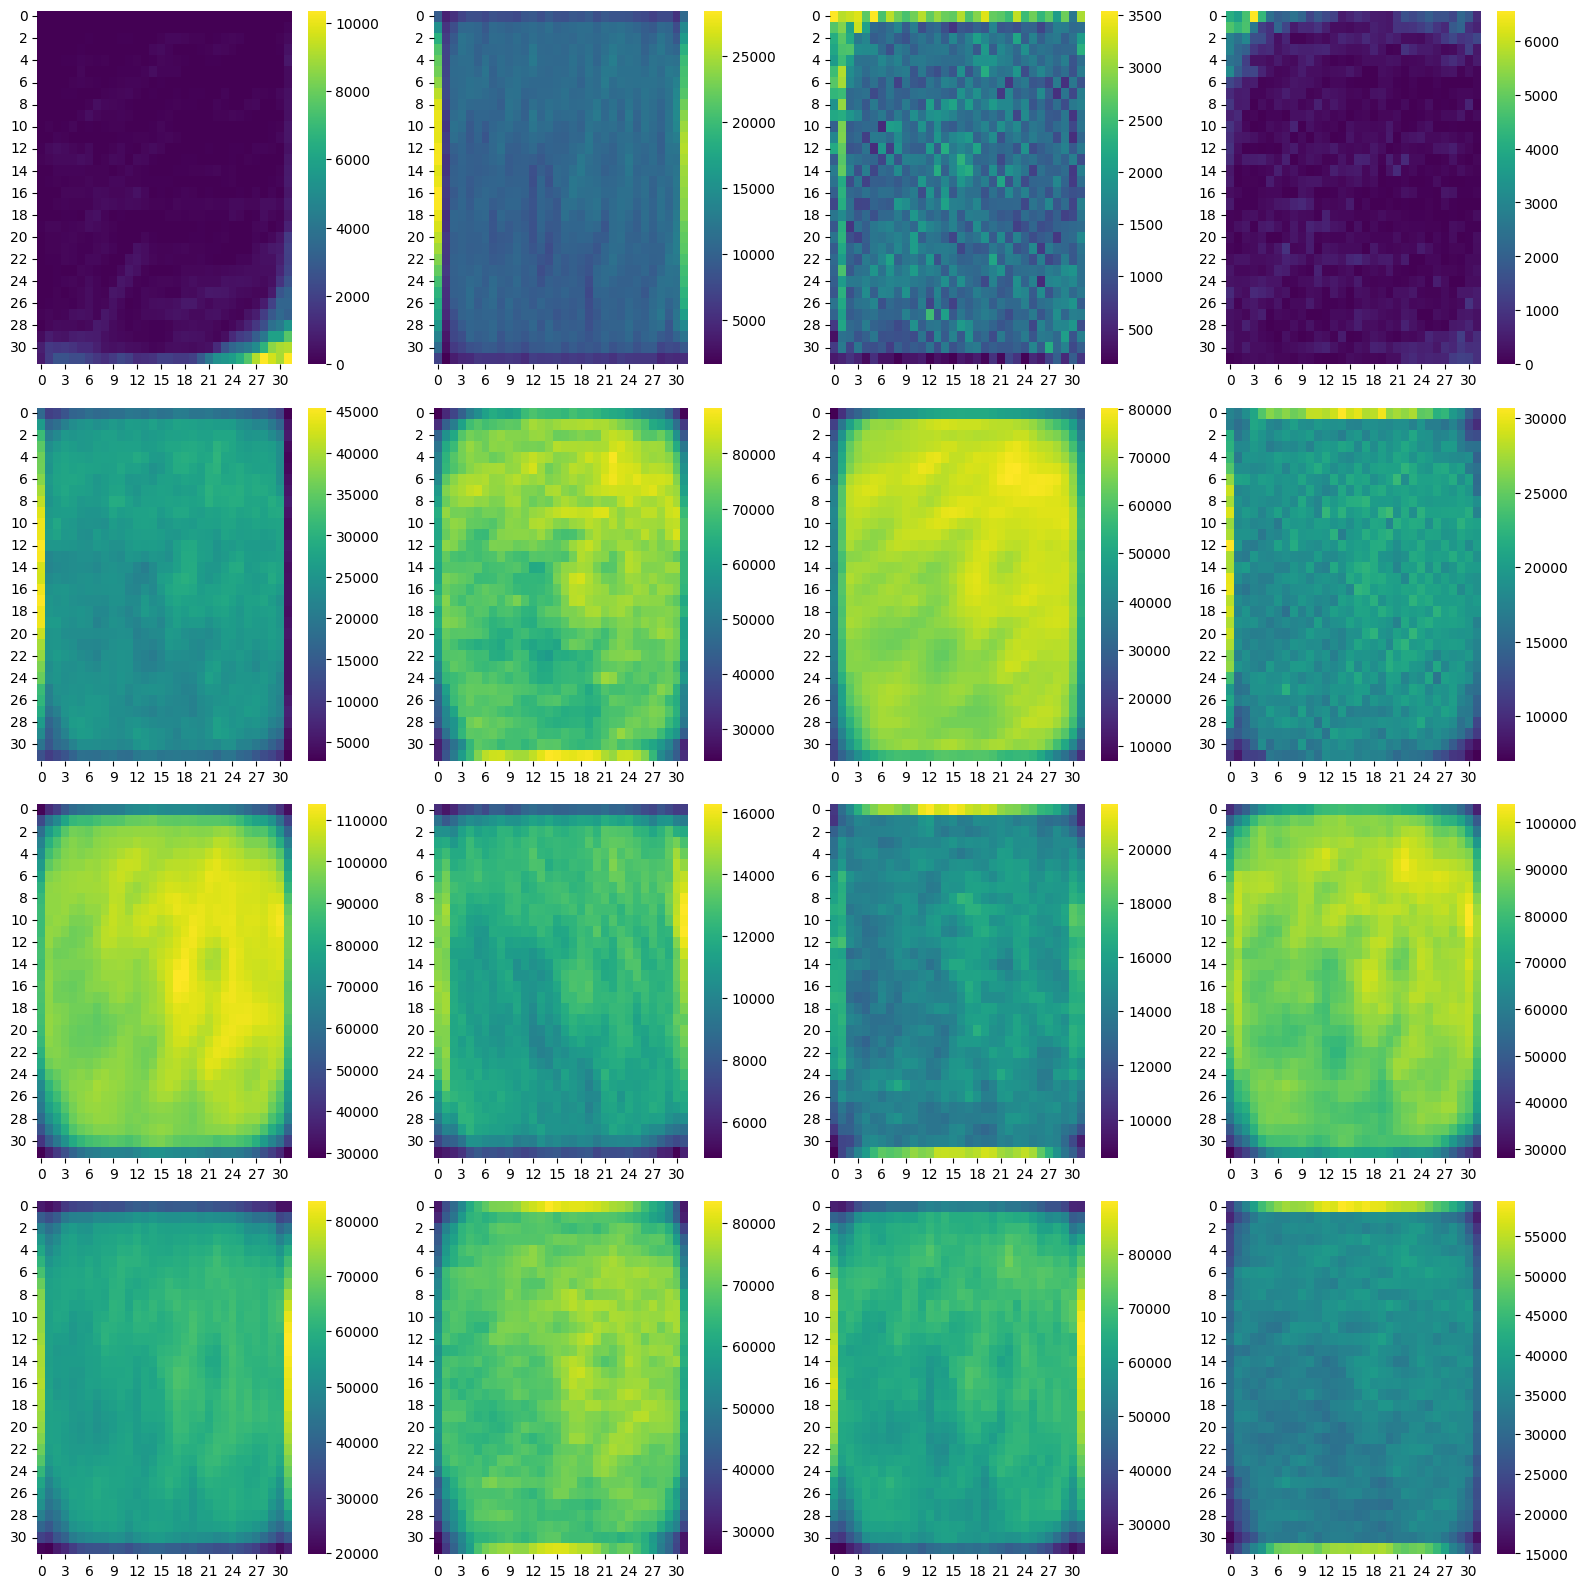

In [158]:
# Create a figure and axis object using Matplotlib
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Loop through each subplot and plot the heatmap
for i, ax in enumerate(axes):
    if i < len(divvie):
        sns.heatmap(divvie[i], ax=ax, cmap="viridis", cbar=True)
    else:
        ax.axis('off')  # Turn off axis for empty subplots

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# 16384, 16384
# multiplying through gives 16384
# this contains 16 x 16 x 1024 normalising overlays
# sum for each channel to get denominator term
# divide channel response to get eventual

In [171]:
out.shape, divvie.shape

(torch.Size([128, 16, 32, 32]), torch.Size([16, 32, 32]))

In [175]:
bias = 1e-6
divvies = out / (bias + divvie.unsqueeze(0))

In [176]:
divvies.shape

torch.Size([128, 16, 32, 32])

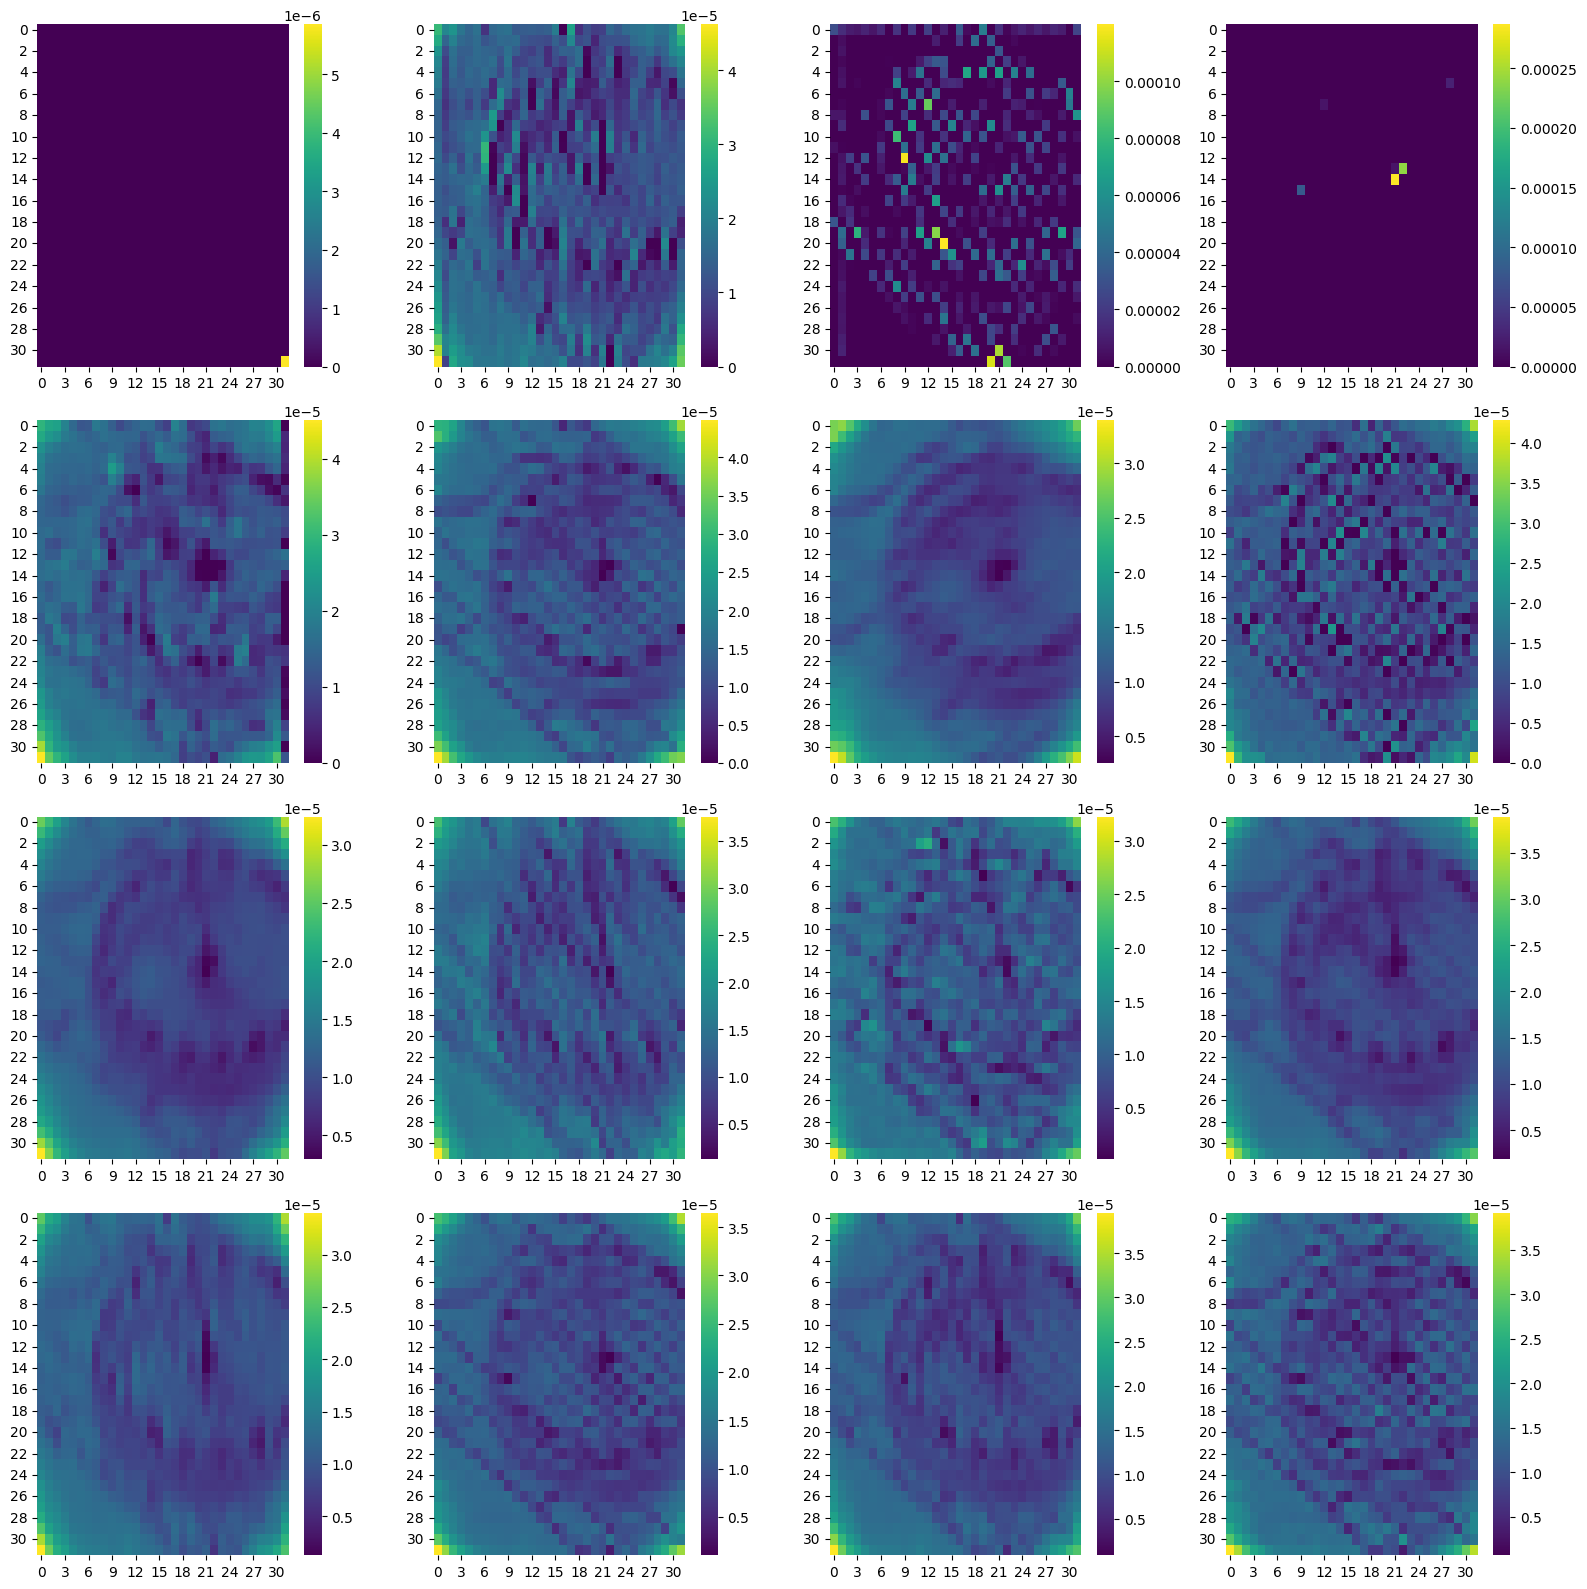

In [179]:
bias = 1e-6
divviee = divvies[2]

# Create a figure and axis object using Matplotlib
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Loop through each subplot and plot the heatmap
for i, ax in enumerate(axes):
    if i < len(divviee):
        sns.heatmap(divviee[i], ax=ax, cmap="viridis", cbar=True)
    else:
        ax.axis('off')  # Turn off axis for empty subplots

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
# propagating through gfb each time may not be the most sensible thing to do here.
# parameters fixed, resulting output given dataset fixed. compute and store might be a reasonable option.

In [6]:
# here, we have a 128x512x(W/d)x(H/d) output for a batch of 128 images. WxH are image dimensions, d is GFB stride.
# each channel response will be correlated with each other on a 1-1 basis
# ideally, linearisation happens from the 2nd dimension onwards, but this is largely RAM-constrained
# for reference, replicating the 128-batch, 512-channel VON method on 64x64 images using a 4-stride would require:
batch_size = 128
channels = 512
stride = 2
img_dim = 64/stride

(channels * img_dim ** 2) ** 2 * 32 / 8 / 2**30 # in gb

# per covariance matrix. a more  compact implementation is therefore required.

1024.0

In [8]:
(512 * 7**2) ** 2 *32 / 8 / 2**30

2.3447265625

In [20]:
batch_size = 128
channels = 64
stride = 2
img_dim = 64/stride

((channels * (img_dim ** 2)) ** 2) * 4 / 2**30 # in gb

16.0

In [24]:
(channels*(img_dim**2))**2 *32 / 8 / 2**30

16.0

In [5]:
2 ** 16

65536

In [6]:
device = torch.device("mps:0")
device

device(type='mps', index=0)

In [7]:
# an alternative method is therefore required in order to compute cov matrices on a per-batch basis.

In [8]:
# dimensionality of batches.
batch_size = 128
channels = 128
img_dim = 16

batch = torch.randn(batch_size, channels, img_dim, img_dim)
batch = batch.reshape(batch_size, -1)
batch = batch.T
batch.shape

torch.Size([32768, 128])

In [10]:
def outer1(a,b):
    return torch.einsum('i,j->ij', a, b)

def outer2(a,b):
    return torch.einsum('bi,bj->bij', a, b)

In [17]:
import tqdm

In [18]:
@torch.jit.script
def outer_numba(a, b):
    m = a.shape[0]
    n = b.shape[0]
    result = torch.empty((m, n), dtype=torch.float)
    for i in range(m):
        for j in range(n):
            result[i, j] = a[i]*b[j]
    return result

In [20]:
# this is also an extremely costly operation on the gpu, time-wise.

In [12]:
def ops(batch=batch, batch_size=batch_size):
    mean = torch.mean(batch, dim=1)
    res2 = batch@batch.T / batch_size
    cov = res2 - outer1(mean, mean)
    den = cov@batch
    return den

In [14]:
ops()

tensor([[-421.6979, -291.4351,  -57.7972,  ...,  -60.4283,  174.5699,
          200.8408],
        [ 328.8390,  230.8167,   69.3959,  ...,  214.1236, -318.6667,
          161.8678],
        [  49.1287,   72.7420, -172.3016,  ...,  411.9048,  265.3748,
         -279.4073],
        ...,
        [ 373.3488,  327.1681,  -73.6682,  ..., -334.9337,  296.7198,
          517.7131],
        [ 274.6473,  259.2677,  -21.8054,  ...,  274.3643,   47.1189,
          -19.5655],
        [-163.4248,  -85.5708, -559.8054,  ..., -356.6627,  189.2984,
          335.9614]])

In [17]:
T = 12.7
100000/128 * T / 3600 # hrs

2.756076388888889

In [ ]:
# compute per each epoch (not sensible)
# once at beginning, then store (100000/128*4.3gb in ram...)

In [24]:
cov[0].shape

torch.Size([32768])

In [5]:
# ideally, the cov matrix here constitutes the starting point for the weights.

In [26]:
den.shape

torch.Size([32768, 128])

In [27]:
bias = 0.1
den += bias

In [6]:
result = torch.div(batch.T, den.T)
channels = 128
result.reshape((batch_size, channels, img_dim, img_dim)).shape

NameError: name 'batch' is not defined

NameError: name 'result' is not defined

In [30]:
# this is how the procedure would normally be implemented from the get-go. next up is generalised divisive normalisation.

In [2]:
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.autograd import Function

In [3]:
class LowerBound(Function):
    @staticmethod
    def forward(ctx, inputs, bound):
        b = torch.ones(inputs.size(), device=inputs.device)*bound
        b = b.to(inputs.device)
        ctx.save_for_backward(inputs, b)
        return torch.max(inputs, b)
  
    @staticmethod
    def backward(ctx, grad_output):
        inputs, b = ctx.saved_tensors

        pass_through_1 = inputs >= b
        pass_through_2 = grad_output < 0

        pass_through = pass_through_1 | pass_through_2
        return pass_through.type(grad_output.dtype) * grad_output, None

In [4]:
class GDN(nn.Module):
    """
    adapted from https://github.com/jorge-pessoa/pytorch-gdn.

    
    """
    def __init__(self,
                 ch,
                 device,
                 inverse=False,
                 beta_min=1e-6,
                 gamma_init=.1,
                 reparam_offset=2**-18):
        super(GDN, self).__init__()
        self.inverse = inverse
        self.beta_min = beta_min
        self.gamma_init = gamma_init
        self.reparam_offset = torch.tensor([reparam_offset], device=device)

        self.build(ch, torch.device(device))
  
    def build(self, ch, device):
        self.pedestal = self.reparam_offset**2
        self.beta_bound = (self.beta_min + self.reparam_offset**2)**.5
        self.gamma_bound = self.reparam_offset

        # Create beta param
        beta = torch.sqrt(torch.ones(ch, device=device)+self.pedestal)
        self.beta = nn.Parameter(beta)

        # Create gamma param
        eye = torch.eye(ch, device=device)
        g = self.gamma_init*eye
        g = g + self.pedestal
        gamma = torch.sqrt(g)
        self.gamma = nn.Parameter(gamma)

    def forward(self, inputs):
        unfold = False
        if inputs.dim() == 5:
            unfold = True
            bs, ch, d, w, h = inputs.size() 
            inputs = inputs.view(bs, ch, d*w, h)

        _, ch, _, _ = inputs.size()

        # Beta bound and reparam
        beta = LowerBound.apply(self.beta, self.beta_bound)
        beta = beta**2 - self.pedestal 

        # Gamma bound and reparam
        gamma = LowerBound.apply(self.gamma, self.gamma_bound)
        gamma = gamma**2 - self.pedestal
        gamma  = gamma.view(ch, ch, 1, 1)

        # Norm pool calc
        # norm_ = nn.functional.conv2d(inputs**2, gamma, beta)
        """
        the first crucial change here: in the vonenet paper implementation, the exponent is 1.
        """
        norm_ = nn.functional.conv2d(inputs, gamma, beta)



        norm_ = torch.sqrt(norm_)
  
        # Apply norm
        if self.inverse:
            outputs = inputs * norm_
        else:
            outputs = inputs / norm_

        if unfold:
            outputs = outputs.view(bs, ch, d, w, h)
        return outputs

In [ ]:
gdn = GDN(ch=channels, device=device, inverse=False, beta_min=1e-6, gamma_init=0.1)

In [10]:
def slow_outer(a, b):
    m = a.shape[0]
    n = b.shape[0]
    result = torch.zeros((m, n))
    for i in tqdm.tqdm(range(m)):
            result[i][:n//4] = a[i]*b[:n//4]
            result[i][n//4+1:n//2] = a[i]*b[n//4+1:n//2]
            result[i][n//2+1:2*n//4] = a[i]*b[n//2+1:2*n//4]
            result[i][3*n//4+1:] = a[i]*b[3*n//4+1:]
    return result

In [ ]:
import cython

In [11]:
slow_outer(mean, mean)

100%|██████████| 32768/32768 [00:01<00:00, 29332.31it/s]


tensor([[ 0.0443, -0.0492, -0.0380,  ..., -0.0228,  0.0139,  0.0072],
        [-0.0492,  0.0547,  0.0423,  ...,  0.0254, -0.0155, -0.0080],
        [-0.0380,  0.0423,  0.0327,  ...,  0.0196, -0.0120, -0.0062],
        ...,
        [-0.0228,  0.0254,  0.0196,  ...,  0.0118, -0.0072, -0.0037],
        [ 0.0139, -0.0155, -0.0120,  ..., -0.0072,  0.0044,  0.0023],
        [ 0.0072, -0.0080, -0.0062,  ..., -0.0037,  0.0023,  0.0012]])

In [13]:
def avg_matrix_outer_products_v2(a):
      x_dim = a.shape[0]
      ourter_products = slow_outer(a[0], a[0])
      for j in range(1, x_dim):
          ourter_products += slow_outer(a[j], a[j])
      return ourter_products / x_dim

In [14]:
result = avg_matrix_outer_products_v2(batch.T)
result.shape

 32%|███▏      | 10638/32768 [00:00<00:01, 13178.31it/s]


KeyboardInterrupt: 

In [56]:
result = result / batch_size

In [57]:
means = outer1(mean, mean)

In [58]:
vars = result - means

In [60]:
vars.shape

torch.Size([32768, 32768])

In [6]:
from numba import jit

@jit
def outer_numba(a, b):
    m = a.shape[0]
    n = b.shape[0]
    result = np.zeros((m, n), dtype=float)
    for i in range(m):
        for j in range(n):
            result[i, j] = a[i]*b[j]
    return result

In [7]:
means = torch.outer(mean, mean)

In [8]:
means.shape

torch.Size([80000, 80000])

In [9]:
res1 = batch@batch.T

: 

In [12]:
def outer_numba(a, b):
    m = a.shape[0]
    n = b.shape[0]
    result = np.zeros((1605632,1605632))
    for i in range(m):
        for j in range(n):
            result[i, j] = a[i]*b[j]
    return result

In [13]:
outer_numba(mn, mn)

KeyboardInterrupt: 

In [14]:
np.kron(mn,mn)

: 

In [50]:
norm_mean = [0.5, 0.5, 0.5]
norm_std = [0.5, 0.5, 0.5]

In [51]:
"tiny-imagenet-200"

'tiny-imagenet-200'

In [52]:
dataset = torchvision.datasets.ImageFolder(
    os.path.join("/Users/metehergul/vonenet-mete/tiny-imagenet-200", 'train'),
    torchvision.transforms.Compose([
        # torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=norm_mean, std=norm_std),
        torchvision.transforms.Grayscale()
    ]))
data_loader = torch.utils.data.DataLoader(dataset,
                                            batch_size=128,
                                            shuffle=True,
                                            num_workers=2,
                                            pin_memory=True)

In [53]:
import tqdm

In [65]:
inp.size(0)

128

In [66]:
i = 0
catch = torch.tensor([])

for (inp, target) in tqdm.tqdm(data_loader):

    if inp.size(0) != 128:
        break
    
    catch = torch.cat([catch, inp])

  0%|          | 0/782 [00:00<?, ?it/s]0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
100%|█████████▉| 781/782 [01:00<00:00, 12.95it/s]


In [63]:
catch.shape

torch.Size([0])

In [47]:
i = 0
catch = None

cov_sum = torch.zeros(128, 128)

for (inp, target) in tqdm.tqdm(data_loader):

    if inp.size(0) != 128:
        break

    input_tensor = inp.squeeze(1).unsqueeze(0).view(-1,128,4096)

    for batch in input_tensor:
        # Compute mean along samples dimension
        mean = torch.mean(batch, dim=1, keepdim=True)
        
        # Center the data
        centered_data = batch - mean
        
        # Compute covariance matrix for the batch
        cov_batch = torch.matmul(centered_data, centered_data.t()) / (batch.size(1) - 1)
        
        # Add covariance matrix of the batch to the sum
        cov_sum += cov_batch

        i += 1

covariance_matrix_avg = cov_sum/i

  0%|          | 0/782 [00:00<?, ?it/s]0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
100%|█████████▉| 781/782 [00:29<00:00, 26.28it/s]


In [44]:
128*4096

524288

In [40]:
# Example input tensor with dimensions (128, 512, 625)
input_tensor = inp.squeeze(1).unsqueeze(0).view(-1,128,4096)
print(input_tensor.shape)

# Initialize a tensor to store the sum of covariance matrices
cov_sum = torch.zeros(128, 128)

# Iterate over batches
for batch in input_tensor:
    # Compute mean along samples dimension
    mean = torch.mean(batch, dim=1, keepdim=True)
    
    # Center the data
    centered_data = batch - mean
    
    # Compute covariance matrix for the batch
    cov_batch = torch.matmul(centered_data, centered_data.t()) / (batch.size(1) - 1)
    
    # Add covariance matrix of the batch to the sum
    cov_sum += cov_batch

# Average covariance matrices across batches
covariance_matrix_avg = cov_sum / input_tensor.size(0)

# NORMALISE SUMS!!!

# Print the average covariance matrix
print(covariance_matrix_avg)

torch.Size([1, 128, 4096])
tensor([[ 0.3446,  0.0234,  0.0722,  ...,  0.0198,  0.0313,  0.0159],
        [ 0.0234,  0.2305,  0.0488,  ...,  0.0268,  0.0019, -0.0025],
        [ 0.0722,  0.0488,  0.3480,  ...,  0.0366,  0.0515,  0.0561],
        ...,
        [ 0.0198,  0.0268,  0.0366,  ...,  0.1555, -0.0158,  0.0139],
        [ 0.0313,  0.0019,  0.0515,  ..., -0.0158,  0.2901, -0.0341],
        [ 0.0159, -0.0025,  0.0561,  ...,  0.0139, -0.0341,  0.2402]])


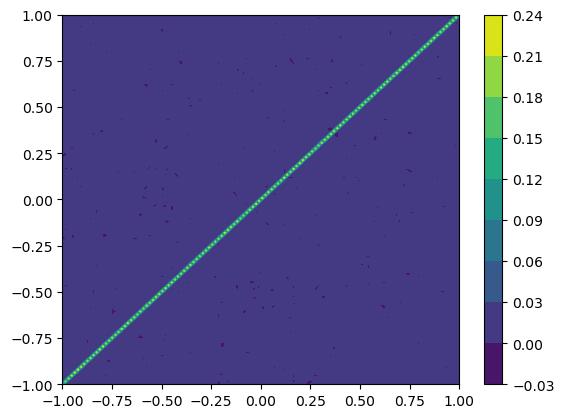

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

x=torch.linspace(-1,1,128)


gk1 = covariance_matrix_avg
contourf1 = plt.contourf(x,x,gk1)
plt.colorbar()